# K Nearest Neighbors - Projeto 

Bem-vindo ao Projeto de KNN! Este será um projeto simples e muito parecido com o notebook, com a diferença de que você receberá outro conjunto de dados. Vá em frente e siga as instruções abaixo.
## Importar bibliotecas
** Importe pandas, seaborn e as bibliotecas usuais. **

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Obtenha os dados
** Leia o arquivo csv 'KNN_Project_Data' em um DataFrame **

In [2]:
df = pd.read_csv("KNN_Project_Data", index_col=0)

** Verifique o cabeçalho do DataFrame.**

In [3]:
df.head()

,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
XVPM,,,,,,,,,,
1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


# Análise exploratória de dados

Uma vez que esses dados são artificiais, vamos criar um grande pairplot com o Seaborn.

** Use seaborn no DataFrame para criar um pairplot com a tonalidade indicada pela coluna TARGET CLASS. **

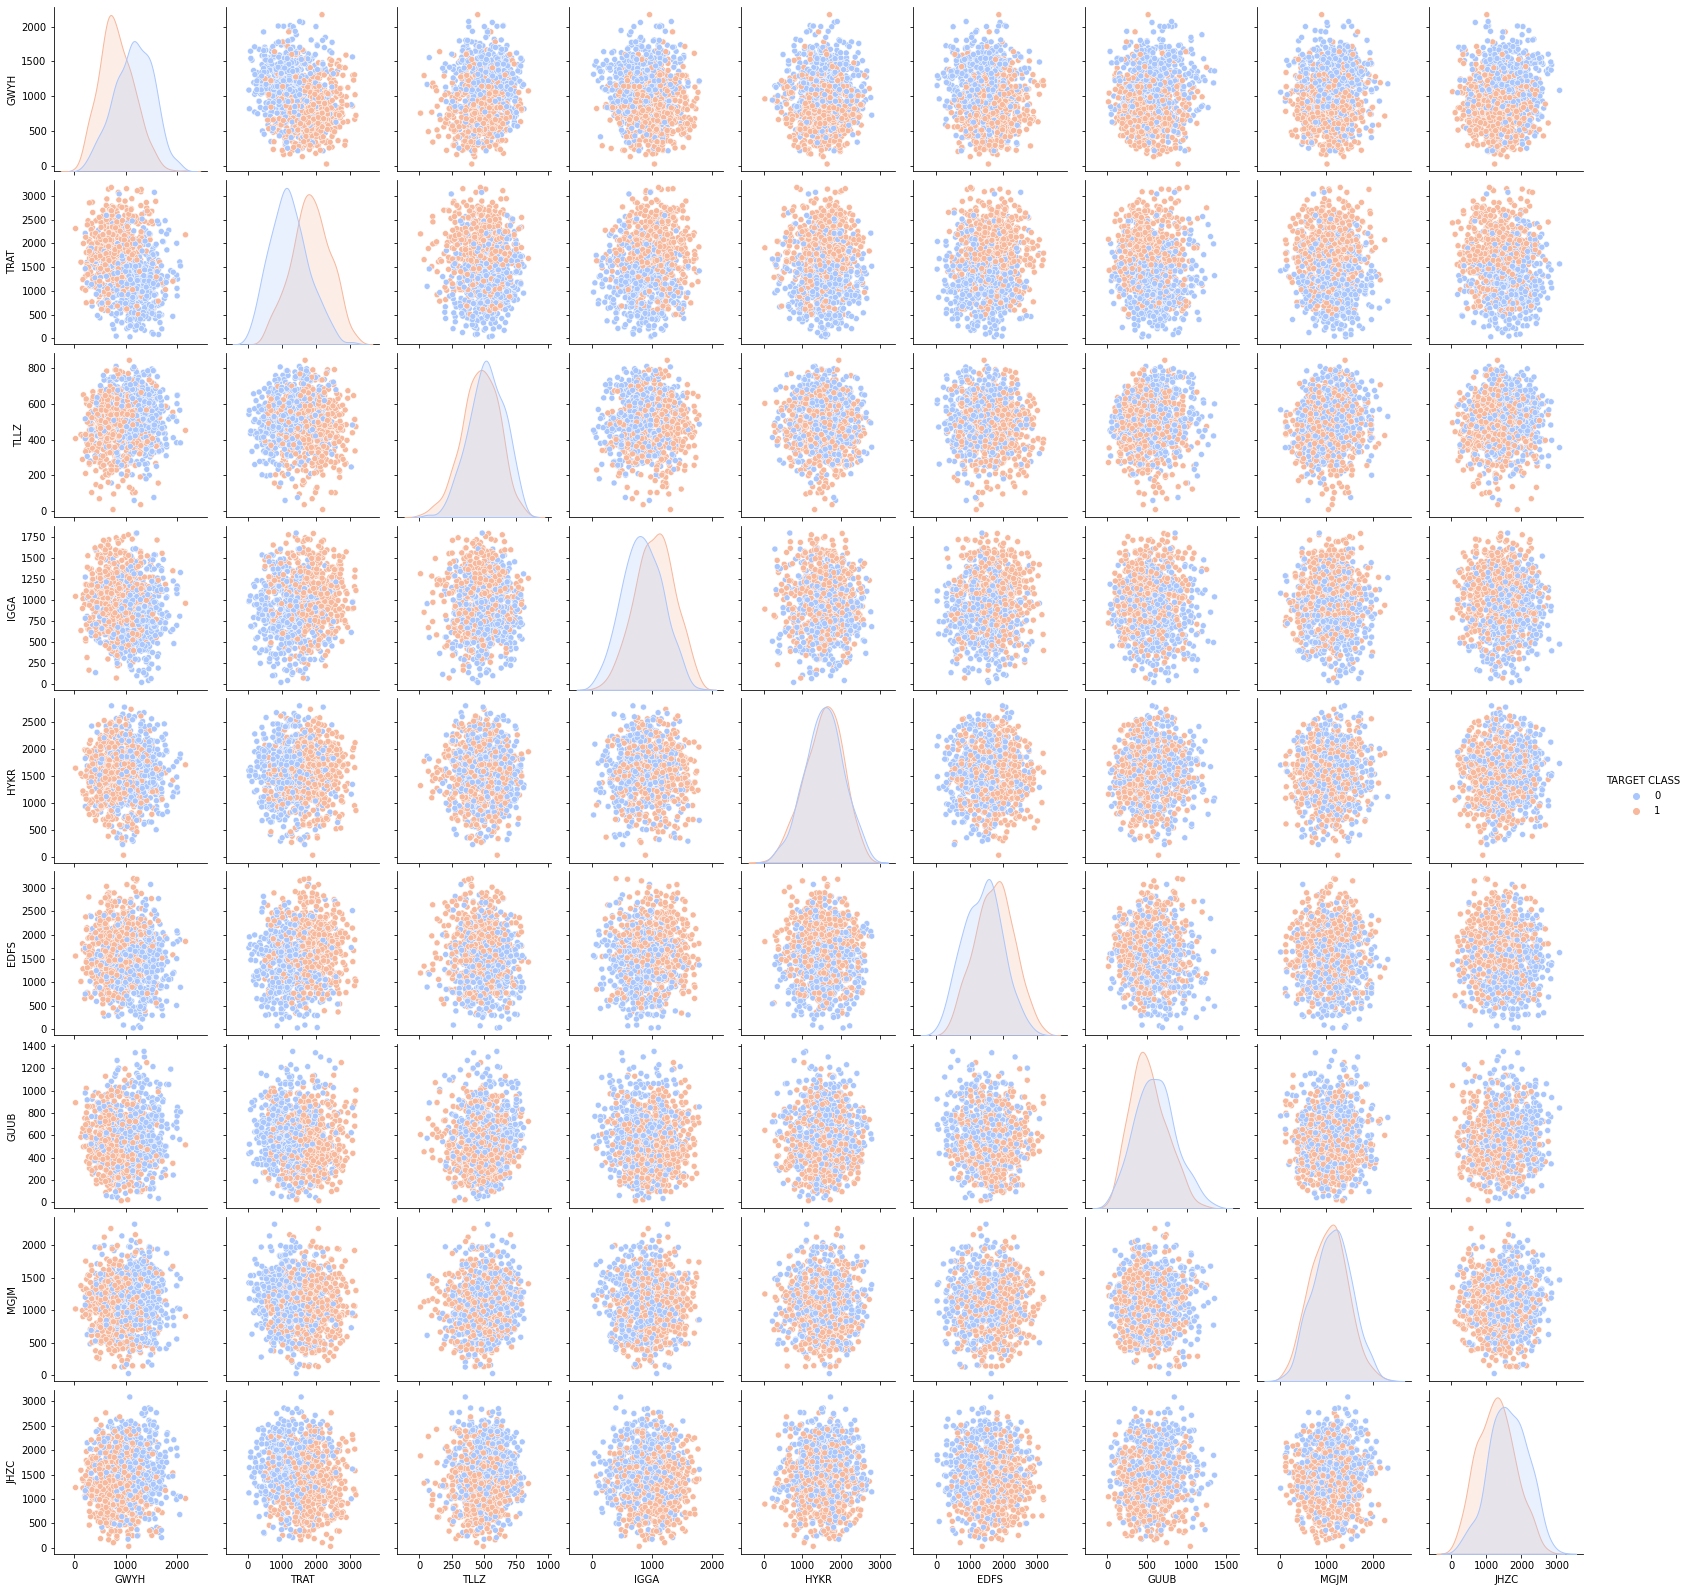

In [4]:
sns.pairplot(df, hue="TARGET CLASS", palette="coolwarm")

# Padronize as variáveis

Hora de para padronizar as variáveis.

** Import StandardScaler do Scikit-learn. **

In [5]:
from sklearn.preprocessing import StandardScaler

** Crie um objeto StandardScaler() chamado scaler. **

In [6]:
scaler = StandardScaler()

** Use o método fit() do objeto para treinar o modelo. **

In [7]:
scaler.fit(df.drop("TARGET CLASS", axis=1))

StandardScaler()

** Use o método .transform () para transformar os parâmetros em uma versão padronizada. **

In [9]:
df_normally = scaler.transform(df.drop("TARGET CLASS", axis=1))

** Converta os parâmetros padronizados em um DataFrame e verifique o cabeçalho desse DataFrame para garantir que a transform() funcionou. **

In [11]:
df_param = pd.DataFrame(df_normally, columns=df.columns[:-1])
df_param.head()

,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


# Divisão treino-teste

** Use o método train_test_split para dividir seus dados em um conjunto treino e teste.**

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train, x_test, y_train, y_test = train_test_split(df_param, df["TARGET CLASS"], test_size=0.3)

# Usando o KNN

** Importe o KNeighborClassifier do scikit learn. **

In [14]:
from sklearn.neighbors import KNeighborsClassifier

** Crie uma instância do modelo KNN com n_neighbors = 1 **

In [15]:
knn = KNeighborsClassifier(n_neighbors=1)

** Ajuste este modelo KNN aos dados de treinamento. **

In [16]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

# Previsões e avaliações
Vamos avaliar o nosso modelo KNN!

** Use o método de previsão para prever valores usando seu modelo KNN e X_test. **

In [19]:
predict = knn.predict(x_test)

** Crie uma matriz de confusão e um relatório de classificação. **

In [20]:
from sklearn.metrics import classification_report, confusion_matrix

In [21]:
print(confusion_matrix(y_test, predict))

[[111  48]
 [ 27 114]]


In [22]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.80      0.70      0.75       159
           1       0.70      0.81      0.75       141

    accuracy                           0.75       300
   macro avg       0.75      0.75      0.75       300
weighted avg       0.76      0.75      0.75       300



# Escolhendo o valor K
Vamos continuar usando o método do cotovelo para escolher um bom valor K!

** Crie um loop for que treine vários modelos KNN com valores k diferentes e, em seguida, mantenha um registro do error_rate para cada um desses modelos com uma lista. Consulte o notebook se você estiver confuso nesta etapa. **

In [23]:
error_rate = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred = knn.predict(x_test)
    error_rate.append(np.mean(pred!=y_test))

** Agora crie o seguinte gráfico usando as informações do seu loop. **

Text(0, 0.5, 'Error Rate')

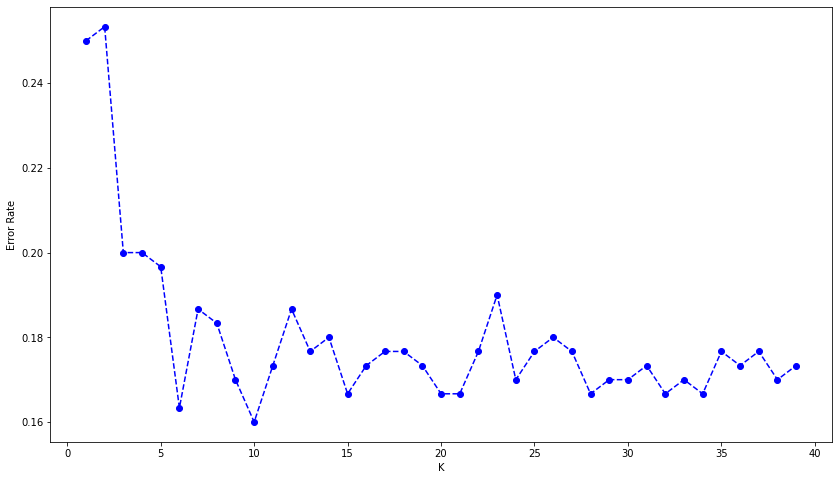

In [25]:
plt.figure(figsize=(14, 8))
plt.plot(range(1, 40), error_rate, color="blue", linestyle="dashed", marker="o")
plt.xlabel("K")
plt.ylabel("Error Rate")

## Treine seu modelo novamente com novo valor K

** Treine novamente seu modelo com o melhor valor K (até você para decidir o que deseja) e re-faça o relatório de classificação e a matriz de confusão. **

In [31]:
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.87      0.80      0.83       159
           1       0.79      0.87      0.83       141

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83      0.83       300

